In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kendalltau
from cliffs_delta import cliffs_delta

sns.set_theme(style="whitegrid", context='talk', palette='Greys')
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <21EE4B82-3593-3E9A-9C2F-834611EB708A> /Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.
/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/", R: "/Users/giord/Progetti

## Distribution of the data

In [2]:
data = pd.read_csv("../data/bias_symptoms_logreg_unbal.csv", index_col=[0, 1])

In [3]:
def plot_differences(symps, symp, symp_name, ax=None):
    corr_high_sp = symps[symps["statistical_parity"] == 1][symp].values
    corr_low_sp = symps[symps["statistical_parity"] == 0][symp].values
    corr_high_eo = symps[symps["equal_opportunity"] == 1][symp].values
    corr_low_eo = symps[symps["equal_opportunity"] == 0][symp].values
    corr_high_ao = symps[symps["average_odds"] == 1][symp].values
    corr_low_ao = symps[symps["average_odds"] == 0][symp].values
    df = pd.DataFrame(
        {
            symp_name: [
                corr_high_sp,
                corr_low_sp,
                corr_high_eo,
                corr_low_eo,
                corr_high_ao,
                corr_low_ao,
            ],
            "Metric": [
                "Statistical Parity",
                "Statistical Parity",
                "Equal Opportunity",
                "Equal Opportunity",
                "Average Odds",
                "Average Odds",
            ],
            "Bias": ["High", "Low", "High", "Low", "High", "Low"],
        }
    )
    df = df.explode(symp_name)
    g = sns.FacetGrid(df, col="Metric", height=4, aspect=1)
    g.map(
        sns.barplot,
        "Bias",
        symp_name,
        "Bias",
        order=["Low", "High"],
        hue_order=["Low", "High"],
        palette=sns.color_palette()[1:4:2],
    )
    g.set_titles("{col_name}")
    g.add_legend()
    # g.facet_axis(0,0).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False)[1]))
    # g.facet_axis(0,1).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False)[1]))
    # g.facet_axis(0,2).set_xlabel("T test pvalue: "+str(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False)[1]))
    g.set_axis_labels("", symp_name)
    # plt.savefig(f"figs/{symp_name}.pdf", bbox_inches="tight")
    # plt.show()
    print(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False))
    print(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False))
    print(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False))
    print(cliffs_delta(corr_high_sp, corr_low_sp))
    print(cliffs_delta(corr_high_eo, corr_low_eo))
    print(cliffs_delta(corr_high_ao, corr_low_ao))
    return g

### Analysis of Mutual Information

TtestResult(statistic=12.763897120165879, pvalue=9.335723891740651e-37, df=5159.209999680623)
TtestResult(statistic=4.796240059729346, pvalue=1.6732552152631151e-06, df=4162.830437512064)
TtestResult(statistic=8.866616825916202, pvalue=1.0075508669268701e-18, df=5413.468198969153)
(0.25144217240408967, 'small')
(0.05276602090883331, 'negligible')
(0.16519336575120425, 'small')


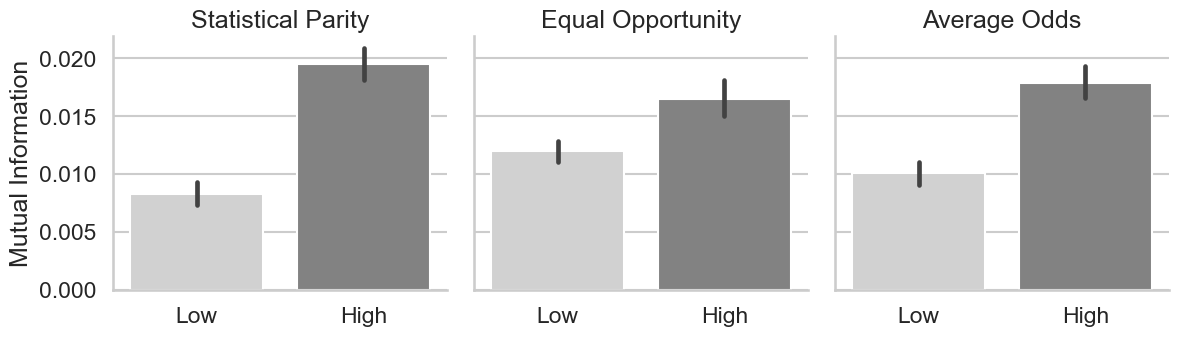

In [5]:
g = plot_differences(data, "mutual_info", "Mutual Information")
# g.facet_axis(0, 0).set_xlabel(
#     "p-value: $9.33*10^{-37}$", labelpad=5, fontdict={"fontsize": 18}
# )
# g.facet_axis(0, 1).set_xlabel(
#     "p-value: $3.12*10^{-6}$", labelpad=5, fontdict={"fontsize": 18}
# )
# g.facet_axis(0, 2).set_xlabel(
#     "p-value: $1.01*10^{-18}$", labelpad=5, fontdict={"fontsize": 18}
# )
plt.savefig("figs/Mutual_Information.pdf", bbox_inches="tight")
plt.show()

## Kendall's Tau

TtestResult(statistic=4.651459793604827, pvalue=3.3790804810504482e-06, df=5110.23555046582)
TtestResult(statistic=1.6348618477556232, pvalue=0.10214231565563263, df=4894.685903632139)
TtestResult(statistic=2.135171437841945, pvalue=0.0327928011184278, df=5292.006595537628)
(0.06837939390738224, 'negligible')
(0.0007678701922359925, 'negligible')
(0.028023423053215535, 'negligible')


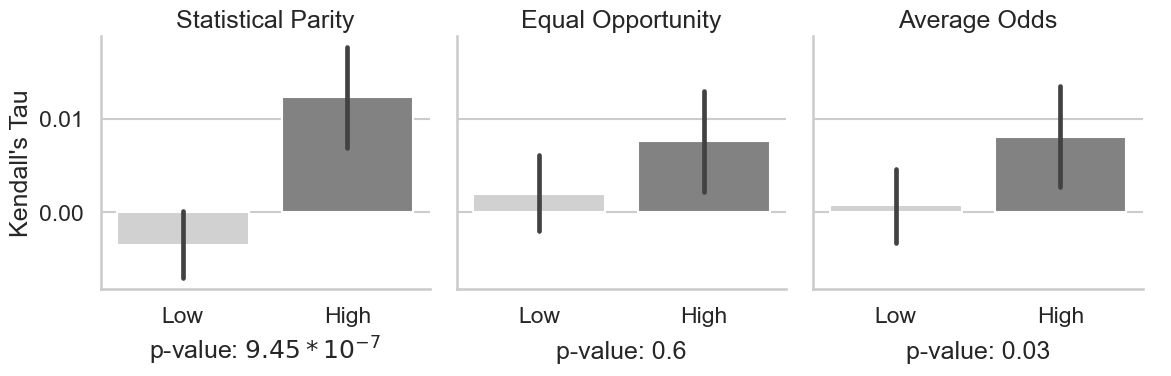

In [6]:
g = plot_differences(data, "correlation_true", "Kendall's Tau")

g.facet_axis(0,0).set_xlabel("p-value: $9.45*10^{-7}$", labelpad=5, fontdict={'fontsize': 18})
g.facet_axis(0, 1).set_xlabel(
    "p-value: 0.6", labelpad=10, fontdict={"fontsize": 18}
)
g.facet_axis(0, 2).set_xlabel(
    "p-value: 0.03", labelpad=10, fontdict={"fontsize": 18}
)
plt.savefig("figs/Kendall's Tau.pdf", bbox_inches="tight")
plt.show()

TtestResult(statistic=13.882609700334605, pvalue=1.0709968954692808e-42, df=3501.8429890270904)
TtestResult(statistic=8.095462311083864, pvalue=6.866766691542164e-16, df=5923.844695150273)
TtestResult(statistic=11.980636594966441, pvalue=1.9283503042360296e-32, df=3487.416737023732)
(0.43901269302957974, 'medium')
(0.5939573770002834, 'large')
(0.28938086432436133, 'small')


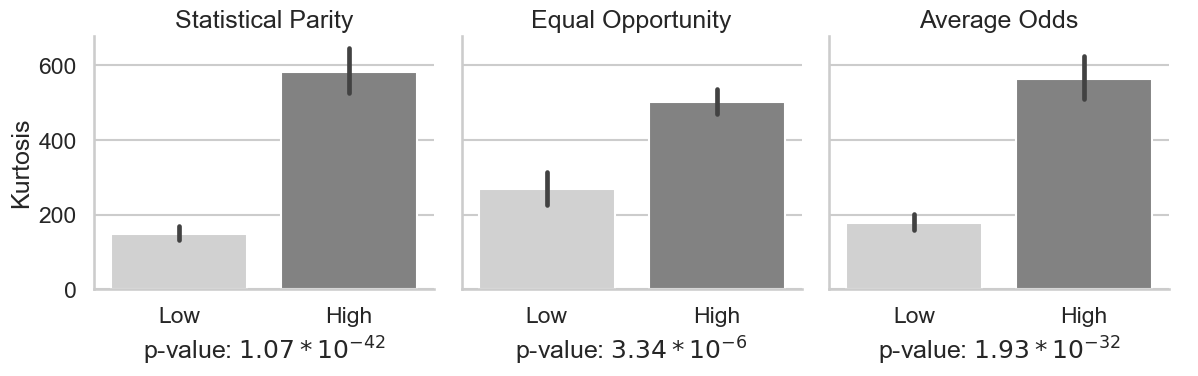

In [7]:
g = plot_differences(data, "kurtosis_var", "Kurtosis")
g.facet_axis(0,0).set_xlabel("p-value: $1.07*10^{-42}$", labelpad=5, fontdict={'fontsize': 18})
g.facet_axis(0, 1).set_xlabel(
    "p-value: $3.34*10^{-6}$", labelpad=5, fontdict={"fontsize": 18}
)
g.facet_axis(0, 2).set_xlabel(
    "p-value: $1.93*10^{-32}$", labelpad=5, fontdict={"fontsize": 18}
)
g.savefig("figs/Kurtosis.pdf", bbox_inches="tight")


TtestResult(statistic=17.74163167950281, pvalue=4.564143032015199e-68, df=4382.171430541467)
TtestResult(statistic=23.81874827644731, pvalue=1.3110689507682708e-118, df=4791.915451120719)
TtestResult(statistic=10.365667542269412, pvalue=7.037997632171611e-25, df=4229.06155010211)
(0.36432571581565326, 'medium')
(0.5450602955870729, 'large')
(0.20635390270072826, 'small')


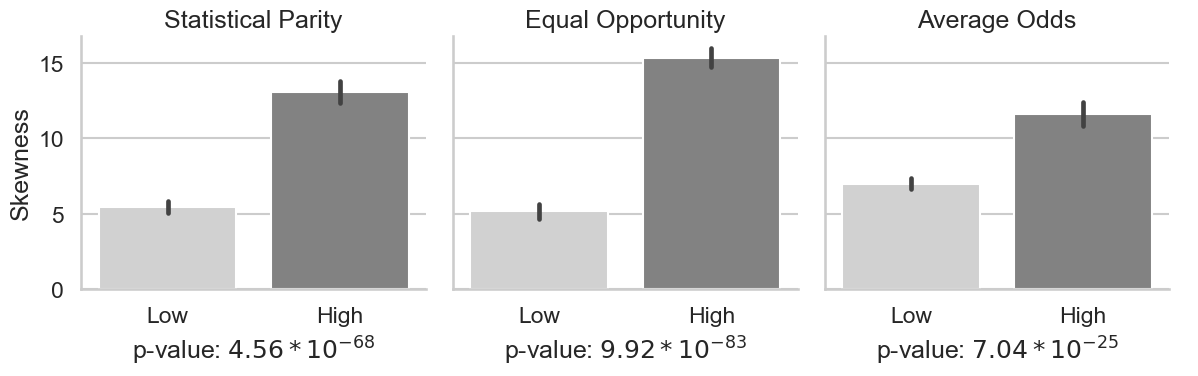

In [8]:
g = plot_differences(data, "skew_var", "Skewness")
g.facet_axis(0,0).set_xlabel("p-value: $4.56*10^{-68}$", labelpad=5, fontdict={'fontsize': 18})
g.facet_axis(0, 1).set_xlabel(
    "p-value: $9.92*10^{-83}$", labelpad=5, fontdict={"fontsize": 18}
)
g.facet_axis(0, 2).set_xlabel(
    "p-value: $7.04*10^{-25}$", labelpad=5, fontdict={"fontsize": 18}
)
g.savefig("figs/Skewness.pdf", bbox_inches="tight")
plt.show()


## Metrics Distribution

In [9]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
              data[data["statistical_parity"] == 0].shape[0]/data.shape[0],
              data[data["statistical_parity"] == 1].shape[0]/data.shape[0],
            ],
            "Equal Opportunity": [
              data[data["equal_opportunity"] == 0].shape[0]/data.shape[0],
              data[data["equal_opportunity"] == 1].shape[0]/data.shape[0],
            ],
            "Average Odds": [
              data[data["average_odds"] == 0].shape[0]/data.shape[0],
              data[data["average_odds"] == 1].shape[0]/data.shape[0],
            ],
            "Bias": ["Low", "High"]
        }
    ]
)

In [10]:
distr = distr.explode(['Statistical Parity', 'Equal Opportunity', 'Average Odds', 'Bias']).melt(id_vars='Bias', var_name='Metric', value_name='Percentage')

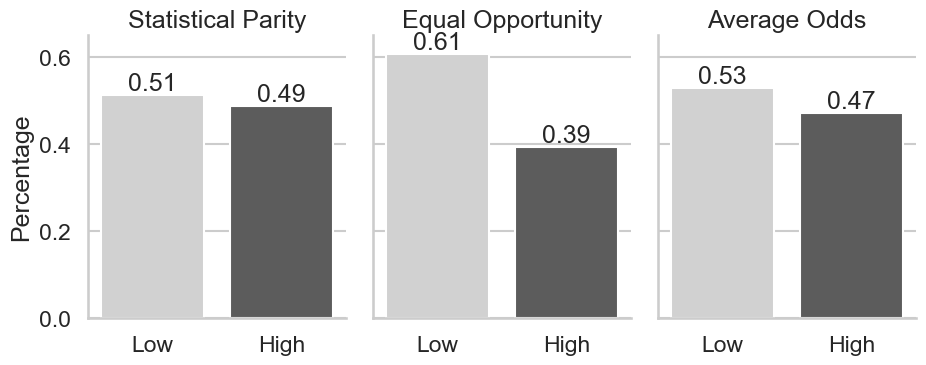

In [11]:
g = sns.catplot(
    data=distr,
    col="Metric",
    x="Bias",
    y="Percentage",
    kind="bar",
    hue="Bias",
    palette=sns.color_palette()[1:5:3],
    height=4,
    aspect=0.8,
)


for i in range(3):
    g.facet_axis(0, i).bar_label(g.facet_axis(0, i).containers[0], fmt="%.2f")
    g.facet_axis(0, i).bar_label(g.facet_axis(0, i).containers[1], fmt="%.2f")

g.set_titles("{col_name}")
# plt.subplots_adjust(top=1.3)
g.set_axis_labels("")
plt.ylim(0,0.65)
plt.tight_layout()
plt.savefig('metrics_distr.png', dpi=300, bbox_inches='tight')
plt.savefig("figs/metrics_distr.pdf", bbox_inches="tight")
plt.show()

## Distribution of SP, EO and AO

In [12]:
raw = pd.read_csv("../data/bias_symptoms_raw_logreg.csv", index_col=[0, 1])
metrics = raw[['statistical_parity', 'equal_opportunity', 'average_odds']]
metrics = pd.melt(metrics, var_name='Metric', value_name='Value')
metrics['Metric'] = metrics['Metric'].map({'statistical_parity': 'Statistical Parity', 'equal_opportunity': 'Equal Opportunity', 'average_odds': 'Average Odds'})
metrics['Value'] = metrics['Value'].abs()

In [13]:
raw[['statistical_parity', 'equal_opportunity', 'average_odds']].abs().describe()

,statistical_parity,equal_opportunity,average_odds
count,5930.000000,5893.000000,5930.000000
mean,0.223380,0.164061,0.212512
std,0.199799,0.190150,0.206985
min,0.000000,0.000000,0.000000
25%,0.039648,0.019323,0.021523
50%,0.196647,0.091837,0.129636
75%,0.369281,0.266667,0.357851
max,1.000000,0.999312,1.000000


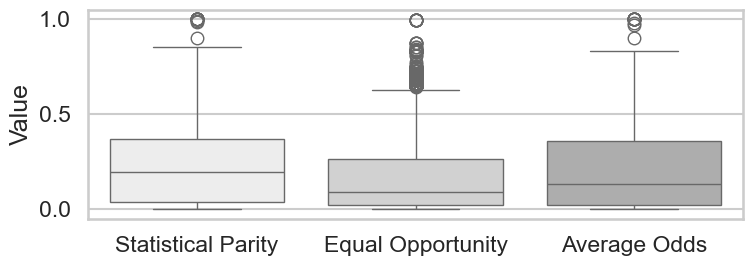

In [11]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(data=metrics, x='Metric', y='Value', hue='Metric')
plt.xlabel('')
plt.tight_layout()
plt.savefig('figs/metrics_boxplot.pdf', bbox_inches='tight')
plt.show()

## Distribution of unbalance between items with high SP and low SP

/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


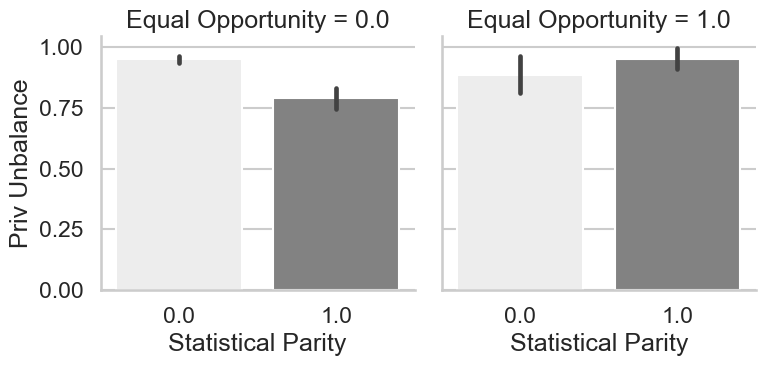

In [14]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# sns.barplot(data=high_prec[high_prec['equal_opportunity'] == 0], y="priv_unbalance", hue="statistical_parity", ax=ax[0])
# sns.barplot(
#     data=low_prec[low_prec["equal_opportunity"] == 0],
#     y="priv_unbalance",
#     hue="statistical_parity",
#     ax=ax[1],
# )

fig = sns.FacetGrid(data, col="equal_opportunity", height=4, aspect=1)
fig.map(
    sns.barplot,
    "statistical_parity",
    "priv_unbalance",
    "statistical_parity",
    hue_order=[0, 1],
    palette=sns.color_palette()[0:4:3],
)
fig.set_titles("Equal Opportunity = {col_name}")
fig.figure.axes[0].set_xlabel("Statistical Parity")
fig.figure.axes[1].set_xlabel("Statistical Parity")
fig.set_ylabels("Priv Unbalance")
fig.tight_layout()
plt.savefig("figs/priv_unbalance.pdf", bbox_inches="tight")
# sns.barplot(
#     data=data[data["equal_opportunity"] == 0],
#     y="priv_unbalance",
#     hue="statistical_parity"
# )

## REDUN Algorithm

In [15]:
data.reset_index(inplace=True)

In [17]:
%%R -i data
library(tidyverse)
library(Hmisc)


data <- data %>% select(-data, -variable)
m <- redun(as.matrix(data, r2 = 0.8, nk = 0))
reducedData <- m$In
data <- data[, reducedData]
data %>% colnames()

 [1] "correlation_true"   "mutual_info"        "unpriv_prob_pos"   
 [4] "unpriv_unbalance"   "priv_unbalance"     "statistical_parity"
 [7] "equal_opportunity"  "average_odds"       "skew_var"          
[10] "gini"               "simpson"            "shannon"           
[13] "ir"                 "pos_prob"          


In [18]:
data_new = data[
    [
      "data", "variable",
        "correlation_true",
        "mutual_info",
        "unpriv_prob_pos",
        "unpriv_unbalance",
        "priv_unbalance",
        "statistical_parity",
        "equal_opportunity",
        "average_odds",
        "skew_var",
        "gini",
        "simpson",
        "shannon",
        "ir",
        "pos_prob"
    ]
]

In [16]:
data_new.columns

Index(['data', 'variable', 'correlation_true', 'mutual_info',
       'unpriv_prob_pos', 'unpriv_unbalance', 'priv_unbalance',
       'statistical_parity', 'equal_opportunity', 'average_odds', 'skew_var',
       'gini', 'simpson', 'shannon', 'ir', 'pos_prob'],
      dtype='object')

In [17]:
data.columns

Index(['variable', 'data', 'correlation_true', 'mutual_info',
       'unpriv_prob_pos', 'priv_prob_pos', 'unpriv_unbalance',
       'priv_unbalance', 'statistical_parity', 'equal_opportunity',
       'average_odds', 'kurtosis_var', 'skew_var', 'gini', 'simpson',
       'shannon', 'ir', 'pos_prob'],
      dtype='object')

In [19]:
data_new.to_csv("../data/bias_symptoms_logreg_unbal_reduced.csv", index=False)

In [20]:
raw = raw.reset_index()

In [21]:
raw_new = raw[
    [
        "data",
        "variable",
        "correlation_true",
        "mutual_info",
        "unpriv_prob_pos",
        "unpriv_unbalance",
        "priv_unbalance",
        "statistical_parity",
        "equal_opportunity",
        "average_odds",
        "skew_var",
        "gini",
        "simpson",
        "shannon",
        "ir",
        "pos_prob",
    ]
]

In [22]:
raw_new

,data,variable,correlation_true,mutual_info,unpriv_prob_pos,unpriv_unbalance,priv_unbalance,statistical_parity,equal_opportunity,average_odds,skew_var,gini,simpson,shannon,ir,pos_prob
0,arrhythmia,1,-0.329830,0.263048,0.250000,0.575000,1.326923,-0.165385,0.003846,0.051515,-0.272071,0.080404,0.029740,0.999956,0.769208,0.326923
1,arrhythmia,23,0.071520,0.075555,0.454545,1.045455,0.000000,0.568182,0.363636,0.591667,4.629568,0.110091,0.016495,0.999949,0.045361,0.454545
2,arrhythmia,24,0.152653,0.042323,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
3,arrhythmia,26,0.021056,0.055834,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
4,arrhythmia,38,0.110542,0.104732,0.444444,1.022222,0.000000,0.555556,0.355556,0.585000,6.782330,0.111328,0.015795,0.999947,0.022126,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,ibm,MaritalStatus_Divorced,-0.095871,0.005095,0.798319,0.977941,1.093750,0.000000,0.094538,0.000000,1.592781,0.101727,0.002141,0.999786,0.235219,0.094538
5926,ibm,MaritalStatus_Married,-0.058910,0.001746,0.794872,0.973718,1.029710,0.000000,0.045708,0.000000,0.123947,0.085857,0.002951,0.999796,0.884604,0.045708
5927,ibm,MaritalStatus_Single,0.141521,0.009645,0.855670,1.048196,0.906500,0.000000,-0.115670,0.000000,0.681858,0.093211,0.002687,0.999794,0.515416,0.115670
5928,ibm,OverTime_No,-0.306588,0.044253,0.645833,0.791146,1.101263,0.000000,0.253157,0.000000,-0.747479,0.074244,0.002644,0.999793,0.484798,0.253157


In [23]:
raw_new.to_csv("../data/bias_symptoms_raw_logreg_unbal_reduced.csv", index=False)